In [66]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot
import numpy as np

In [67]:
#從mnist讀取資料
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [68]:
#印出資料數量
print("Number of train images:", mnist.train.images.shape[0])
print("Number of validation images:", mnist.validation.images.shape[0])
print("Number of test images:", mnist.test.images.shape[0])

Number of train images: 55000
Number of validation images: 5000
Number of test images: 10000


In [69]:
#印出label數量
print("Number of train labels:", mnist.train.labels.shape[0])
print("Number of validation labels:", mnist.validation.labels.shape[0])
print("Number of test labels:", mnist.test.labels.shape[0])

Number of train labels: 55000
Number of validation labels: 5000
Number of test labels: 10000


In [70]:
#查看資料
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

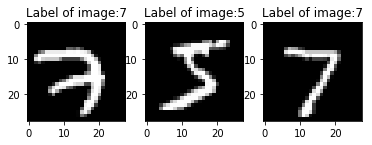

In [71]:
#印出資料及label
pyplot.subplot(231)
pyplot.gca().set_title("Label of image:%d"%np.argmax(mnist.train.labels[0]))
pyplot.imshow(mnist.train.images[0].reshape(28, 28), cmap = "gray")
pyplot.subplot(232)
pyplot.gca().set_title("Label of image:%d"%np.argmax(mnist.validation.labels[0]))
pyplot.imshow(mnist.validation.images[0].reshape(28, 28), cmap = "gray")
pyplot.subplot(233)
pyplot.gca().set_title("Label of image:%d"%np.argmax(mnist.test.labels[0]))
pyplot.imshow(mnist.test.images[0].reshape(28, 28), cmap = "gray")

In [72]:
#定義函式
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    inital = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(inital)

def bias_variable(shape):
    inital = tf.constant(0.1, shape=shape)
    return tf.Variable(inital)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [73]:
#定義輸入用的參數
xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])

In [74]:
##定義第一個特徵的抽取單元
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [75]:
##定義第二個特徵的抽取單元
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [76]:
#全連接層與softmax
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [77]:
#定義訓練方法
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [78]:
#訓練20000次 每1000次印出準確率
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob:0.5})
    if i % 1000 == 0:
        print(compute_accuracy(mnist.test.images, mnist.test.labels))

0.095
0.9683
0.9805
0.9846
0.9873
0.9881
0.99
0.9902
0.9913
0.9906
0.992
0.9917
0.9923
0.9923
0.9923
0.9923
0.992
0.9918
0.9931
0.9927
